In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [8]:
data

,Height,Weight
Index,,
1,65.78331,112.99250
2,71.51521,136.48730
3,69.39874,153.02690
4,68.21660,142.33540
5,67.78781,144.29710
6,68.69784,123.30240
7,69.80204,141.49470
8,70.01472,136.46230
9,67.90265,112.37230


In [14]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


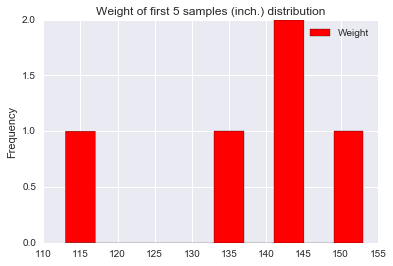

In [13]:
data.head(5).plot(y='Weight',kind='hist',color='red',title='Weight of first 5 samples (inch.) distribution')

In [4]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [5]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

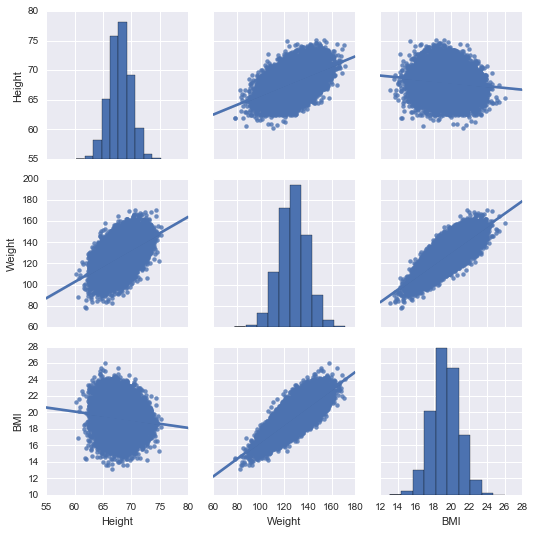

In [21]:
sns.pairplot(data,kind="reg")

In [6]:
def weight_category(weight):
    pass
    # Ваш код здесь
    if weight < 120:
        return 1
    elif weight >=150:
        return 3
    else:
        return 2
data['weight_cat'] = data['Weight'].apply(weight_category)

In [51]:
x_min, x_max = data.Weight.min(), data.Weight.max()
print x_min,x_max

78.01476 170.924


In [55]:
x_min, x_max = data.Weight.min(), data.Weight.max()
x_spac = np.linspace(x_min-10,x_max+10, 300)

In [53]:
w1 = [60,0.05]
w2 = [50,0.16]

In [38]:
w3 = 50
w4 = np.linspace(-1,1,200)

In [39]:
errors = map(lambda w:error(data.Weight,data.Height,w3,w),w4)

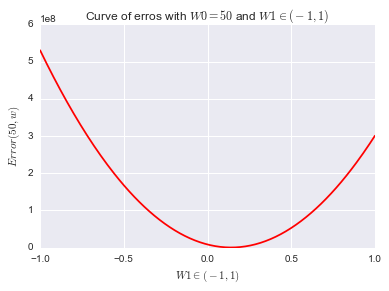

In [46]:
plt.plot(w4,errors,'-r')
plt.xlabel('$W1 \in (-1,1)$')
plt.ylabel('$Error(50,w)$')
plt.title('Curve of erros with $W0 = 50$ and $W1 \in (-1,1)$')
plt.show()

In [47]:
from scipy.optimize import minimize_scalar

In [67]:
def f(w1,x,y,w0):
    return error(x,y,w0,w1)
minimize_scalar(f,args=(data.Weight,data.Height,50),bounds=(-5,5),method='Bounded').x

0.14109203728834441

In [66]:
error(data.Weight,data.Height,50,0.14109203728834441)

AttributeError: 'numpy.float64' object has no attribute 'x'

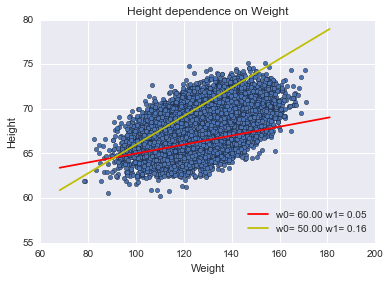

In [65]:
data.plot(y='Height',x='Weight',kind='scatter',title='Height dependence on Weight')
line1, = plt.plot(x_spac,w1[0] + w1[1]*x_spac,'r',label='w0= %.2f w1= %.2f' % (w1[0],w1[1]))
line2, = plt.plot(x_spac,w2[0] + w2[1]*x_spac,'y',label='w0= %.2f w1= %.2f' % (w2[0],w2[1]))
plt.legend(handles=[line1,line2],loc=4)
plt.show()

In [25]:
def error(x,y,w0,w1):
    return sum((y - (w0 + w1*x)) **2)

In [26]:
error(data.Weight,data.Height,w0,w1)

138197.37942816826

In [11]:
w0,w1 = 60,0.05

In [ ]:
error(data['Weight'],data['Height'],w0,w1)

In [45]:
error(data['Weight'],data['Height'],w0,w1)

numpy.float64

In [23]:
data

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.99250,18.357573,1
2,71.51521,136.48730,18.762577,2
3,69.39874,153.02690,22.338895,3
4,68.21660,142.33540,21.504526,2
5,67.78781,144.29710,22.077581,2
6,68.69784,123.30240,18.368870,2
7,69.80204,141.49470,20.417428,2
8,70.01472,136.46230,19.571813,2
9,67.90265,112.37230,17.134953,1


In [68]:
from mpl_toolkits.mplot3d import Axes3D

In [69]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

In [73]:
X

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [76]:
len(np.meshgrid(X, Y)[0])

40

In [ ]:
W1 = np.linspace(-5,5,200)
W0 = np.linspace(-100,100,200)

W0,W1 = np.meshgrid(W0,W1)
Err= []
for i in range(0,200):
    Err.append(map(lambda w0,w1: error(data.Weight,data.Height,w0,w1),W0[i],W1[i]))
Err = np.asarray(Err)

In [98]:
Err

[[16223756098.93539,
  16215715156.800629,
  16207676218.671955,
  16199639284.549192,
  16191604354.432442,
  16183571428.321714,
  16175540506.217056,
  16167511588.118279,
  16159484674.025604,
  16151459763.938829,
  16143436857.858179,
  16135415955.783506,
  16127397057.714941,
  16119380163.65243,
  16111365273.595612,
  16103352387.545189,
  16095341505.500458,
  16087332627.461798,
  16079325753.429302,
  16071320883.402485,
  16063318017.38196,
  16055317155.367506,
  16047318297.358858,
  16039321443.35638,
  16031326593.359785,
  16023333747.369284,
  16015342905.384481,
  16007354067.406063,
  15999367233.433689,
  15991382403.467056,
  15983399577.506475,
  15975418755.552061,
  15967439937.603594,
  15959463123.66114,
  15951488313.724575,
  15943515507.794094,
  15935544705.869724,
  15927575907.951235,
  15919609114.038794,
  15911644324.132242,
  15903681538.231874,
  15895720756.337543,
  15887761978.449047,
  15879805204.566757,
  15871850434.69025,
  15863897668.81

In [90]:
W1[:,0]

array([ -5.00000000e+00,  -4.99000000e+00,  -4.98000000e+00,
        -4.97000000e+00,  -4.96000000e+00,  -4.95000000e+00,
        -4.94000000e+00,  -4.93000000e+00,  -4.92000000e+00,
        -4.91000000e+00,  -4.90000000e+00,  -4.89000000e+00,
        -4.88000000e+00,  -4.87000000e+00,  -4.86000000e+00,
        -4.85000000e+00,  -4.84000000e+00,  -4.83000000e+00,
        -4.82000000e+00,  -4.81000000e+00,  -4.80000000e+00,
        -4.79000000e+00,  -4.78000000e+00,  -4.77000000e+00,
        -4.76000000e+00,  -4.75000000e+00,  -4.74000000e+00,
        -4.73000000e+00,  -4.72000000e+00,  -4.71000000e+00,
        -4.70000000e+00,  -4.69000000e+00,  -4.68000000e+00,
        -4.67000000e+00,  -4.66000000e+00,  -4.65000000e+00,
        -4.64000000e+00,  -4.63000000e+00,  -4.62000000e+00,
        -4.61000000e+00,  -4.60000000e+00,  -4.59000000e+00,
        -4.58000000e+00,  -4.57000000e+00,  -4.56000000e+00,
        -4.55000000e+00,  -4.54000000e+00,  -4.53000000e+00,
        -4.52000000e+00,

In [85]:
W1.size

1000

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

In [91]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

In [92]:
Z

array([[ 0.70886129,  0.57562789,  0.42921793, ...,  0.27541086,
         0.42921793,  0.57562789],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       ..., 
       [ 0.27541086,  0.09046523, -0.09334004, ..., -0.26940744,
        -0.09334004,  0.09046523],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ]])